<IPython.core.display.Math object>

50 pożarów: 82.70999487819813
100 pożarów: 148.45251499453076
200 pożarów: 279.93755522719596


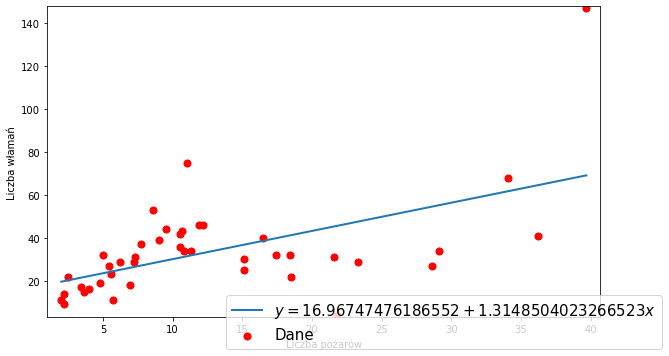

In [4]:
import numpy as np
import csv
import matplotlib.pyplot as pl

from IPython.display import display, Math, Latex

reader = csv.reader(open('fires_thefts.csv'), delimiter=',')

x = list()
y = list()
for xi, yi in reader:
    x.append(float(xi))
    y.append(float(yi))

# Hipoteza: funkcja liniowa jednej zmiennej
def h(theta, x):
    return theta[0] + theta[1] * x

# Funckja kosztu
def funkcja_kosztu(h, theta, x, y):
    m = len(y)
    return 1.0 / (2 * m) * sum((h(theta, x[i]) - y[i])**2 for i in range(m))

# Funkcja gradientu prostego
def gradient_descent(h, cost_fun, theta, x, y, alpha, eps):
    current_cost = cost_fun(h, theta, x, y)
    log = [[current_cost, theta]]  # log przechowuje wartości kosztu i parametrów
    m = len(y)
    while True:
        new_theta = [
            theta[0] - alpha/float(m) * sum(h(theta, x[i]) - y[i]
                                            for i in range(m)),
            theta[1] - alpha/float(m) * sum((h(theta, x[i]) - y[i]) * x[i]
                                            for i in range(m))]
        theta = new_theta  # jednoczesna aktualizacja - używamy zmiennej tymaczasowej
        try:
            current_cost, prev_cost = cost_fun(h, theta, x, y), current_cost
        except OverflowError:
            break
        if abs(prev_cost - current_cost) <= eps:
            break
        log.append([current_cost, theta])
    return theta, log

# Wyświetlanie macierzy w LaTeX-u:
def LatexMatrix(matrix):
    ltx = r'\left[\begin{array}'
    m, n = matrix.shape
    ltx += '{' + ("r" * n) + '}'
    for i in range(m):
        ltx += r" & ".join([('%.4f' % j.item()) for j in matrix[i]]) + r" \\\\ "
    ltx += r'\end{array}\right]'
    return ltx

# Obliczanie parametrów θ krzywej regresyjnej dla alpha 0.001, 0.01 i 0.1
best_theta_001, log_001 = gradient_descent(h, funkcja_kosztu, [0.0, 0.0], x, y, alpha=0.001, eps=0.0000001)
best_theta_01, log_01 = gradient_descent(h, funkcja_kosztu, [0.0, 0.0], x, y, alpha=0.01, eps=0.0000001)
best_theta_1, log_1 = gradient_descent(h, funkcja_kosztu, [0.0, 0.0], x, y, alpha=0.1, eps=0.0000001)

# Wyświetlanie wyniku
display(Math(r'\large\textrm{Wynik:}\quad \theta = ' +
             LatexMatrix(np.matrix(best_theta_001).reshape(2,1)) +
            (r' \quad J(\theta) = %.4f' % log_001[-1][0])
            + r' \quad \textrm{po %d iteracjach}' % len(log_001)))

# Funckje do wyświetlania wykresu
def regdots(x, y):    
    fig = pl.figure(figsize=(16*.6, 9*.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.scatter(x, y, c='r', s=50, label='Dane')
    
    ax.set_xlabel(u'Liczba pożarów')
    ax.set_ylabel(u'Liczba włamań')
    ax.margins(.05, .05)
    pl.ylim(min(y) - 1, max(y) + 1)
    pl.xlim(min(x) - 1, max(x) + 1)
    return fig

def regline(fig, fun, theta, x):
    ax = fig.axes[0]
    x0, x1 = min(x), max(x)
    X = [x0, x1]
    Y = [fun(theta, x) for x in X]
    ax.plot(X, Y, linewidth='2',
            label=(r'$y={theta0}{op}{theta1}x$'.format(
                theta0=theta[0],
                theta1=(theta[1] if theta[1] >= 0 else -theta[1]),
                op='+' if theta[1] >= 0 else '-')))

def legend(fig):
    ax = fig.axes[0]
    handles, labels = ax.get_legend_handles_labels()
    # try-except block is a fix for a bug in Poly3DCollection
    try:
        fig.legend(handles, labels, fontsize='15', loc='lower right')
    except AttributeError:
        pass

# Wykres
fig = regdots(x, y)
regline(fig, h, best_theta_001, x)
legend(fig)

# Przewidywana liczba włamań dla 50, 100, 200 pożarów
predicted_y = h(best_theta_001, 50)
print('50 pożarów: ' + str(predicted_y))
predicted_y = h(best_theta_001, 100)
print('100 pożarów: ' + str(predicted_y))
predicted_y = h(best_theta_001, 200)
print('200 pożarów: ' + str(predicted_y))
